## Data visualization cheat sheet 2
I used this notebook to experiment and play with some visualization

In [46]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [47]:
import math
plt.style.use('ggplot')

In [48]:
x_1 = np.arange(1,5.5,0.5)
y_1 = x_1**2

xr = np.random.randint(1,11,50)
yr = np.arange(50)

Creating polynomials and visualizing them (line plot)

In [49]:
def polynomial1(x):
    return (x**5+x+1)
def polynomial2(x):
    return (x+5)/x**2



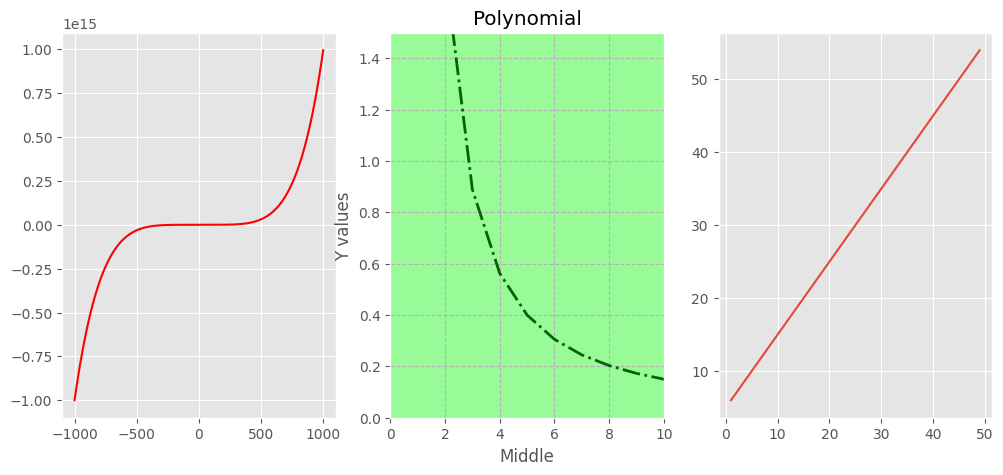

In [50]:
fig,ax = plt.subplots(1,3)
fig.set_size_inches(12, 5)



a = ax[0].plot(range(-1000,1000),[polynomial1(x) for x in range(-1000,1000)])
b = ax[1].plot(range(1,50),[polynomial2(x) for x in range(1,50)],color="darkgreen",lw=2, \
          linestyle='-.')
ax[2].plot(range(1,50),[x+5 for x in range(1,50)])

ax[1].set_title("Polynomial")
ax[1].set_xlabel("Middle")
ax[1].set_ylabel("Y values")
ax[1].set_xlim([0,10])
ax[1].set_ylim([0,1.5])
ax[1].set_facecolor("palegreen")

ax[1].grid(linestyle='--',color='0.7')

a[0].set_color("red")

plt.show()

### Playing with icecreamsales.csv
data is about ice cream sales related to temperature

In [51]:
df = pd.read_csv('C:\\Users\\User\\Downloads\\icecreamsales.csv')
df.sort_values(by="Temperature",inplace=True)
temp = df["Temperature"]
sales = df["Sales"]

Styling line plot

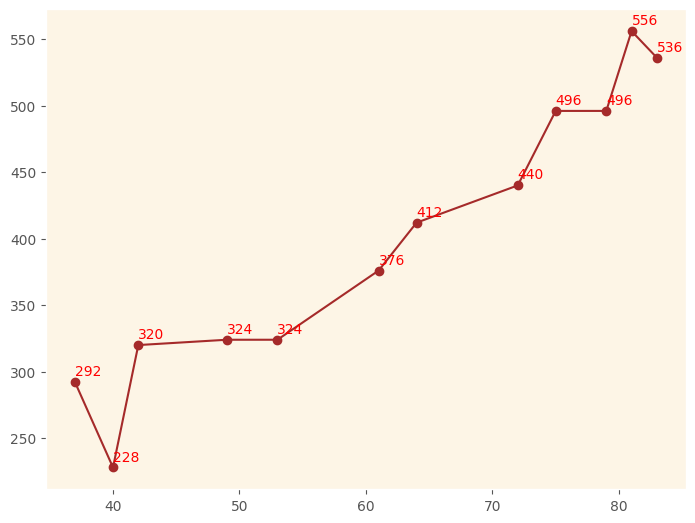

In [52]:
fig2 = plt.figure()
ax = fig2.add_axes([0,0,1,1])
ax.plot(temp,sales,marker="o",color="brown")
ax.set_facecolor('oldlace')
ax.grid()

for x,y in zip(temp,sales):
    ax.annotate(text = y, xy=(x,y+5),color="r")


Simulate rolling 2 dices and ploting distribution of numbers sums (histogram)

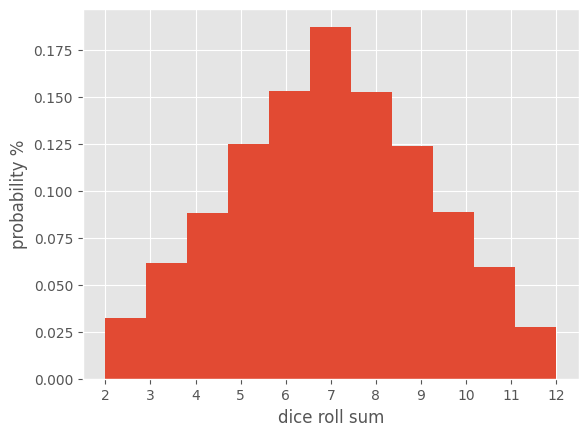

In [53]:
d1 = np.random.randint(1,7,10000)
d2 = np.random.randint(1,7,10000)
dr = d1+d2

plt.hist(dr,bins=11,density=True)
plt.xticks(np.arange(2,13,1))
plt.ylabel("probability %")
plt.xlabel("dice roll sum")


plt.show()


### Playing with fifa_data.csv
data is about fifa game characters statistics and perks

In [54]:
data = "fifa_data.csv"

In [55]:
fifa = pd.read_csv(data)

Group football players by age category and explore age distribution (pie chart)

In [56]:
fifa["Age_category"] = pd.cut(x=fifa["Age"],bins=[0,21,26,31,40,99],labels=["very young","young","moderate age","old","very old"])

([<matplotlib.patches.Wedge at 0x1e2535e6740>,
 [Text(0.43696540449707444, 1.0094856290570502, 'young'),
  Text(-1.0997982467553507, -0.02106695122358541, 'moderate age'),
  Text(0.11433948642479629, -1.094041352894905, 'very young'),
  Text(1.042387133138576, -0.35132472823178973, 'old'),
  Text(1.099998673602775, -0.0017082365574745428, 'very old')],
 [Text(0.2383447660893133, 0.5506285249402091, '37.0%'),
  Text(-0.5998899527756457, -0.01149106430377386, '26.6%'),
  Text(0.06236699259534342, -0.5967498288517663, '26.1%'),
  Text(0.5685747998937686, -0.19163166994461256, '10.2%'),
  Text(0.5999992765106044, -0.0009317653949861141, '0.0%')])

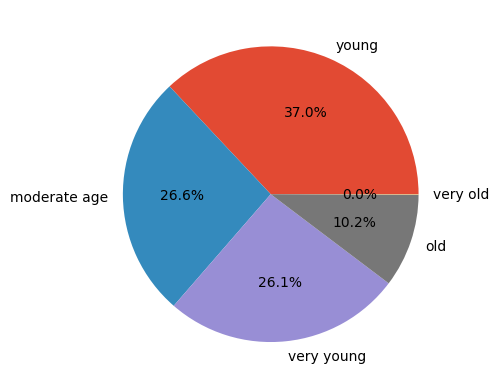

In [57]:
plt.pie(fifa["Age_category"].value_counts(),labels=fifa["Age_category"].value_counts().index,autopct='%1.1f%%')

Comparing avarage overall scores based on different countries (group of bar charts)

In [58]:
bar_table = fifa.groupby(by=["Nationality","Age_category"])["Overall"].mean().loc[["England","Spain","Germany"]].unstack()

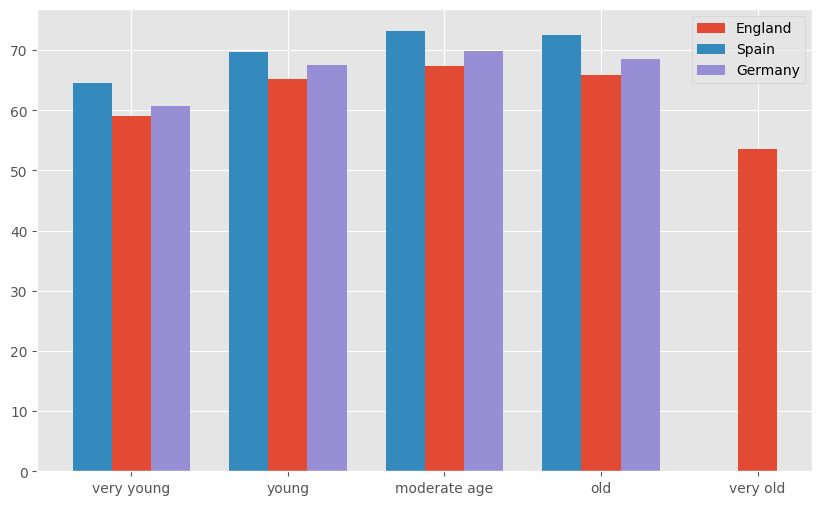

In [59]:
align = np.arange(len(bar_table.loc["England"].index))

plt.figure(figsize=(10,6))

plt.bar(align,bar_table.loc["England"].values,label="England",width=0.25)
plt.bar(align-0.25,bar_table.loc["Spain"].values,label="Spain",width=0.25)
plt.bar(align+0.25,bar_table.loc["Germany"].values,label="Germany",width=0.25)

plt.legend(loc=1)



plt.xticks(align,labels=bar_table.loc["England"].index)
plt.show()

Same thing but with stacked bar chart

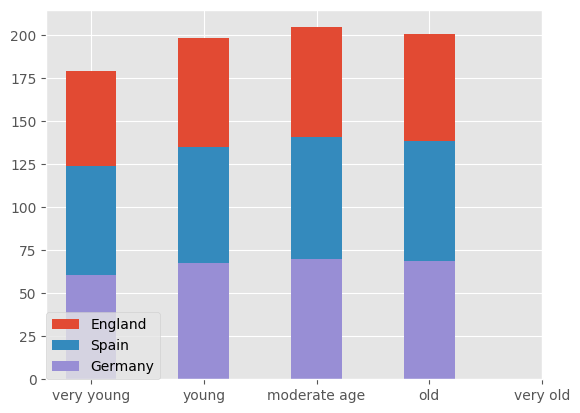

In [60]:
align = np.arange(len(bar_table.loc["England"].index))



england =plt.bar(align,bar_table.loc["England"].values,label="England",width=0.45,bottom = bar_table.loc["Germany"].values+bar_table.loc["England"].values)
spain = plt.bar(align,bar_table.loc["Spain"].values,label="Spain",width=0.45,bottom=bar_table.loc["England"].values)
germany = plt.bar(align,bar_table.loc["Germany"].values,label="Germany",width=0.45)

plt.legend(loc=[0,0])



plt.xticks(align,labels=bar_table.loc["England"].index)
plt.show()

In [61]:
import seaborn as sns

Distribution of age grouped by nationality (boxplot)

<AxesSubplot: >

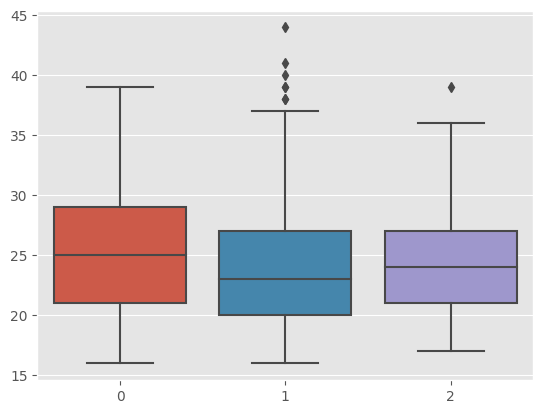

In [62]:
spain = fifa.loc[fifa["Nationality"] == "Spain","Age"].values
germany = fifa.loc[fifa["Nationality"] == "Germany","Age"].values
england = fifa.loc[fifa["Nationality"] == "England","Age"].values



sns.boxplot([spain,england,germany])

Investigating relationship between some of the numeric values (heatmap)

<AxesSubplot: >

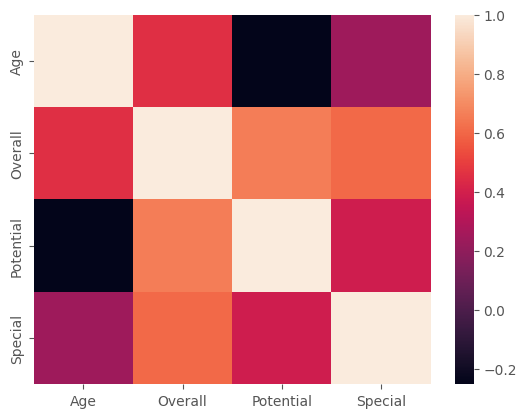

In [63]:
sns.heatmap(fifa.iloc[:,2:15].corr(numeric_only = True))

Distribution/relationship between potential perk and age perk (KDE plot)

<AxesSubplot: xlabel='Age', ylabel='Potential'>

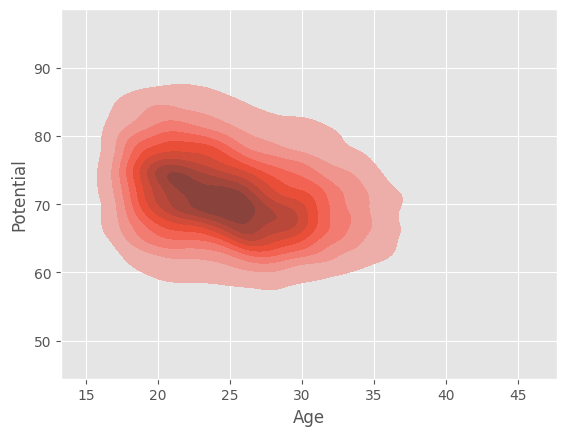

In [64]:
sns.kdeplot(x=fifa["Age"],y=fifa["Potential"],fill=True)

In [65]:
fifa.corr(numeric_only=True).apply(lambda x: x > 0.7).head().loc["Overall"]

Unnamed: 0                  False
ID                          False
Age                         False
Overall                      True
Potential                   False
Special                     False
International Reputation    False
Weak Foot                   False
Skill Moves                 False
Jersey Number               False
Crossing                    False
Finishing                   False
HeadingAccuracy             False
ShortPassing                False
Volleys                     False
Dribbling                   False
Curve                       False
FKAccuracy                  False
LongPassing                 False
BallControl                 False
Acceleration                False
SprintSpeed                 False
Agility                     False
Reactions                    True
Balance                     False
ShotPower                   False
Jumping                     False
Stamina                     False
Strength                    False
LongShots     

Relation between overall perk and reactions perk (regression plot)

<AxesSubplot: xlabel='Overall', ylabel='Reactions'>

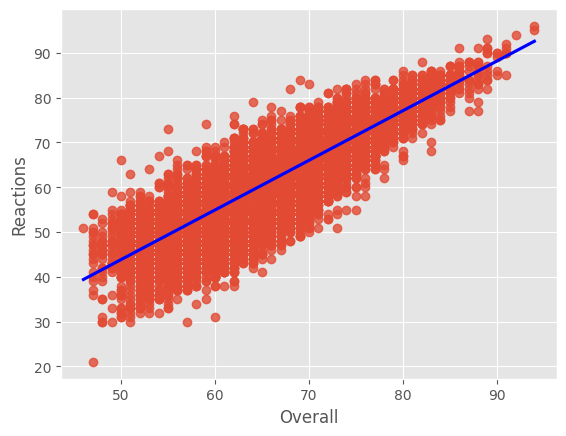

In [66]:
sns.regplot(x=fifa["Overall"],y=fifa["Reactions"],line_kws = {"color":"blue"})

### Playing with financial time series data
all data sets below are different companies share prices through time


In [67]:
goog = pd.read_csv("GOOG.csv")
amzn = pd.read_csv("AMZN.csv")
aapl = pd.read_csv("AAPL.csv")
meta = pd.read_csv("META.csv")
nflx = pd.read_csv("NFLX.csv")

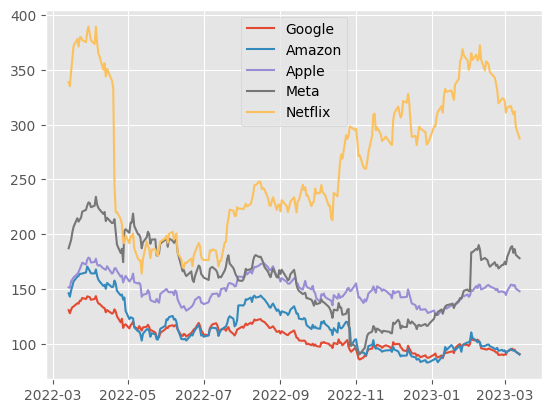

In [68]:
def plot(df,name):
    df = df.copy()
    df["Date"] = pd.to_datetime(df["Date"])
    df.set_index("Date",inplace=True)
    plt.plot(df.index,df.Open,label=name)
    
plot(goog,"Google")
plot(amzn,"Amazon")
plot(aapl,"Apple")
plot(meta,"Meta")
plot(nflx,"Netflix")
plt.legend()